## Problem Statement
The task is to develop a machine learning model to predict rainfall in Sydney using historical weather data. The dataset spans from **2008 to 2017** and includes various weather attributes such as temperature, humidity, pressure, and cloud cover. The objective is to create accurate predictions for whether it will rain the next day, based on current and past weather conditions.

To achieve this, multiple classification models will be employed, including Decision Trees, Random Forest, Bagging, and Boosting techniques. Decision Trees will provide a straightforward approach by recursively splitting data based on feature importance. Random Forest, an ensemble method, will enhance prediction accuracy by averaging multiple decision trees trained on different data subsets. Bagging will use Bootstrap Aggregating to improve model stability and performance. Boosting, such as Gradient Boosting, will sequentially add decision trees to correct previous errors, thus enhancing overall prediction accuracy.

The final goal is to compare the performance of these models based on accuracy score and other metrics. The best-performing model will be selected for its ability to predict rainfall accurately.

### Data Loading and Preprocessing: 

1. **Data Loading**:
   - Begin by importing the necessary libraries: NumPy, pandas, Seaborn, and Matplotlib.
   - Load the dataset using `pandas.read_csv()` or a similar function, depending on the file format. This will create a DataFrame that holds the weather data.
   - Example: `data = pd.read_csv('path_to_data.csv')`.

2. **Initial Exploration**:
   - Use `data.head()` to view the first few rows of the dataset, giving a preliminary look at the data structure and values.
   - Use `data.info()` to get a summary of the DataFrame, including column names, data types, and the number of non-null values in each column. This helps identify any missing values or inconsistencies.

3. **Data Cleaning**:
   - **Handle Missing Values**: Check for missing values using `data.isnull().sum()`. Depending on the nature and extent of missing data, strategy: 
   - Impute missing values with mean, median, or mode (`data.fillna()`).
   
   - **Convert Data Types**: Ensure that each column has the correct data type. For example, convert categorical variables to numeric values using encoding techniques.
   - **Handle Outliers**: Detect and address outliers if necessary, using methods such as IQR (Interquartile Range) or z-scores.

4. **Feature Engineering**:
   - **Create New Features**: Generate new features that might be relevant for the model. For instance, extract day of the week or month from a date column.
   - **Drop Irrelevant Features**: Remove columns that do not contribute to the prediction of rainfall, based on domain knowledge or correlation analysis.

5. **Data Splitting**:
   - Split the dataset into training and testing sets using `train_test_split` from `sklearn.model_selection`. This step is crucial for evaluating the performance of the machine learning models.
   
 

### Model Implementation: 

1. **Model Selection**:
   - Choose a range of classification models to evaluate their performance on the rainfall prediction task. For this problem, consider including:
   
     - **Logistic Regression**:
            A statistical model that estimates probabilities of binary outcomes using a logistic function.
     - **Decision Tree Classifier**: 
            Provides a simple, interpretable model that splits data based on feature importance.
     - **Random Forest Classifier**:
            An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.
     - **Bagging**: 
            Uses multiple base models (e.g., Decision Trees) trained on different subsets of the data to enhance stability and accuracy.
     - **Boosting**:
            Sequentially builds models where each new model corrects errors made by the previous ones, such as Gradient Boosting,ADA Boosting,XG boosting(for the best result)

3. **Model Comparison**:
   - Compare the performance of each model based on accuracy and confusion matrix results.
   - Identify the best-performing model by analyzing which one provides the highest accuracy and most balanced confusion matrix.

4. **Finalize Best Model**:
   - Based on the comparison, select the model with the best performance.
   - Document the results and rationale for choosing the best model.

In [1]:
import numpy as np  # Importing NumPy for numerical operations and handling arrays
import pandas as pd  # Importing pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for advanced data visualization and plotting
import matplotlib.pyplot as plt  # Importing Matplotlib for basic plotting and visualization


In [2]:
data=pd.read_excel(r'D:\Certificates\sydney_rain prediction.xlsx') # Load the dataset

In [3]:
data.head(6) # Display the first 6 rows of the dataset to understand its structure

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes


In [4]:
# Identify numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']

# Identify discrete features (numerical features with less than 25 unique values)
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25]

# Identify continuous features (numerical features not in discrete features)
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

# Identify categorical features
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]

# Print counts
print("Numerical Features Count: {}".format(len(numerical_feature)))
print("Discrete Features Count: {}".format(len(discrete_feature)))
print("Continuous Features Count: {}".format(len(continuous_feature)))
print("Categorical Features Count: {}".format(len(categorical_feature)))


Numerical Features Count: 14
Discrete Features Count: 2
Continuous Features Count: 12
Categorical Features Count: 3


In [6]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day as new features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop the original 'Date' column 
data = data.drop(['Date'], axis=1)


In [7]:
data.info()  # Displays a concise summary of the DataFrame, including the number of non-null entries, data types of each column, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      3337 non-null   object 
 1   MinTemp       3334 non-null   float64
 2   MaxTemp       3335 non-null   float64
 3   Rainfall      3331 non-null   float64
 4   Evaporation   3286 non-null   float64
 5   Sunshine      3321 non-null   float64
 6   Humidity9am   3323 non-null   float64
 7   Humidity3pm   3324 non-null   float64
 8   Pressure9am   3317 non-null   float64
 9   Pressure3pm   3318 non-null   float64
 10  Cloud9am      2771 non-null   float64
 11  Cloud3pm      2776 non-null   float64
 12  Temp9am       3333 non-null   float64
 13  Temp3pm       3333 non-null   float64
 14  RainToday     3331 non-null   object 
 15  RainTomorrow  3337 non-null   object 
 16  Year          3337 non-null   int32  
 17  Month         3337 non-null   int32  
 18  Day           3337 non-null 

In [8]:
data.isna().sum()  #Using dataframe data: check missing values


Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
Year              0
Month             0
Day               0
dtype: int64

In [9]:
import warnings 
warnings.filterwarnings("ignore") # Ignore all warnings

In [10]:
for column in data.columns:
    if data[column].isnull().any():
        if data[column].dtype in ['float64', 'int64']:
            # Use mean to fill for numerical columns
            data[column].fillna(data[column].mean(), inplace=True)
        elif data[column].dtype == 'object':
            # Use mode to fill for categorical/string columns
            data[column].fillna(data[column].mode()[0], inplace=True)


In [11]:
data.isna().sum() # now there is no missing values

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
Year            0
Month           0
Day             0
dtype: int64

In [13]:
data.describe() #for summary statistics to understand the distribution and range of values.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,2012.300869,6.413545,15.705424
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,2.761933,3.397846,8.795802
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,2008.000000,1.000000,1.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,2010.000000,3.000000,8.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,2012.000000,6.000000,16.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,2015.000000,9.000000,23.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,2017.000000,12.000000,31.000000


## Outliers Detection 

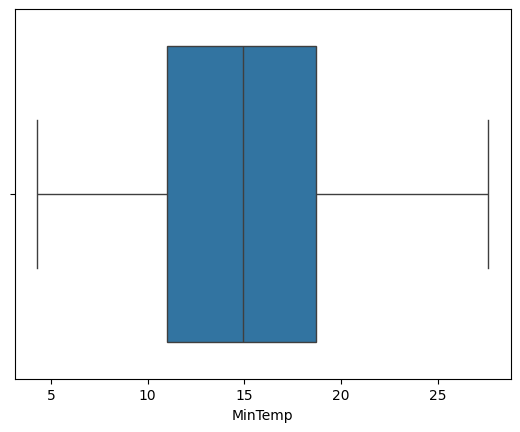

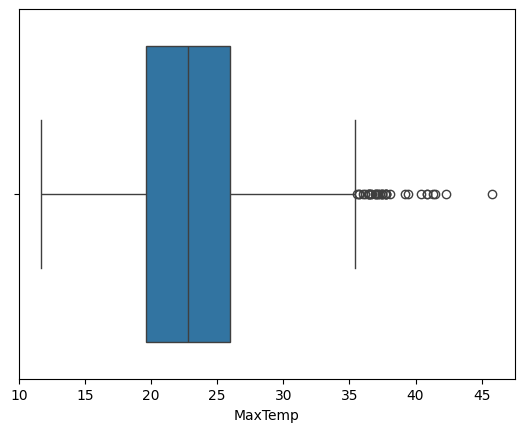

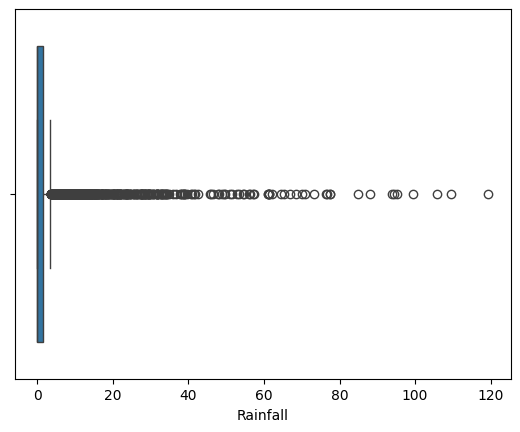

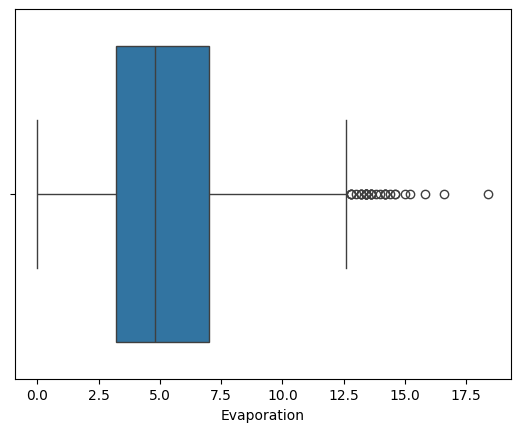

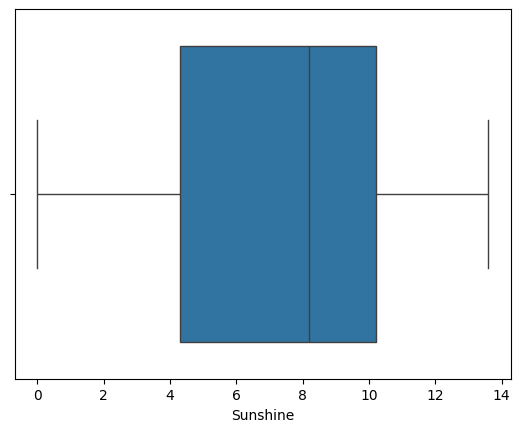

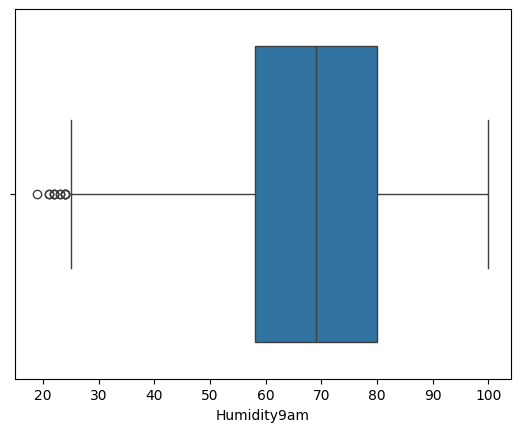

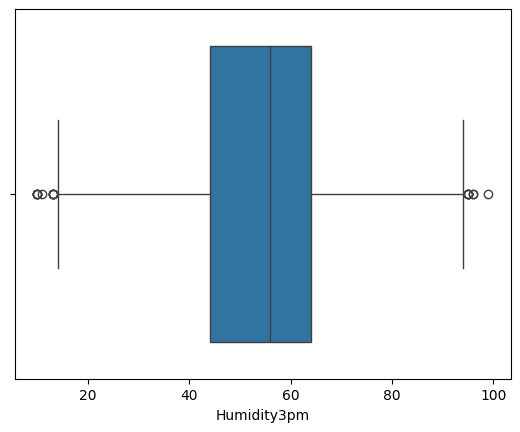

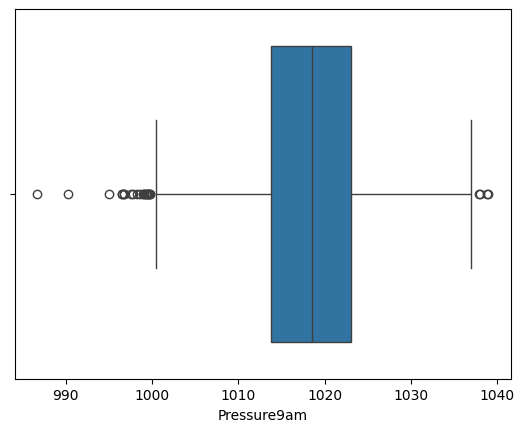

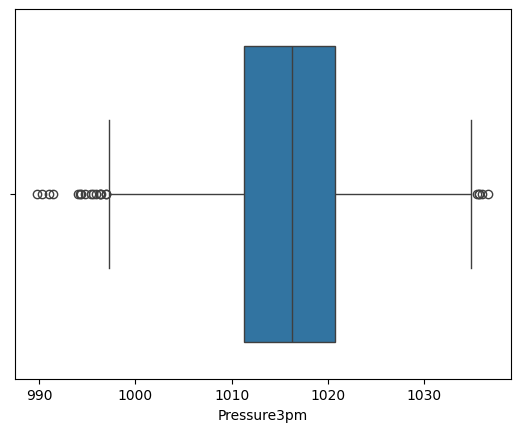

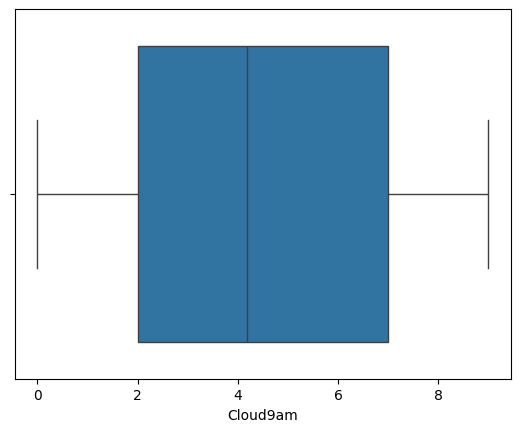

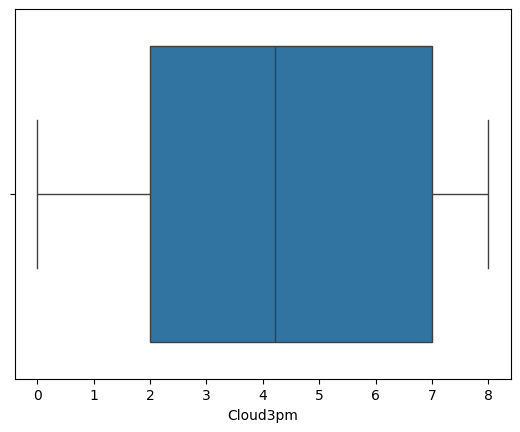

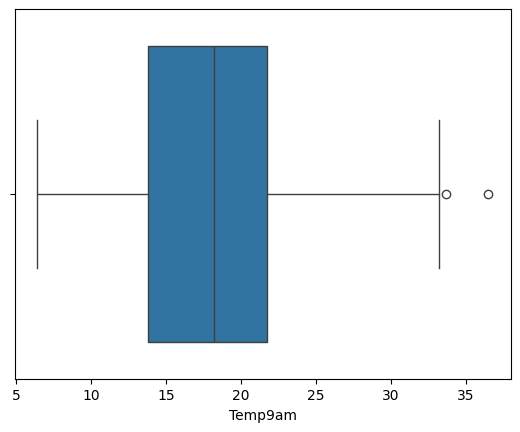

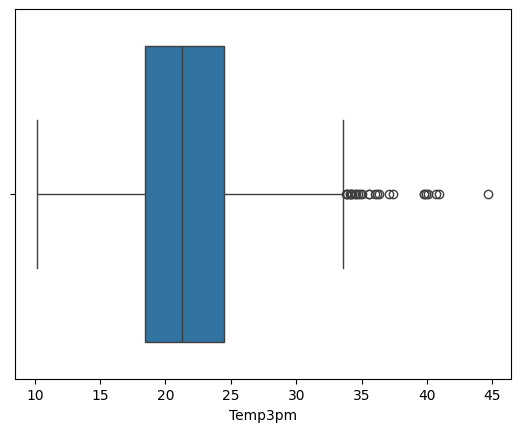

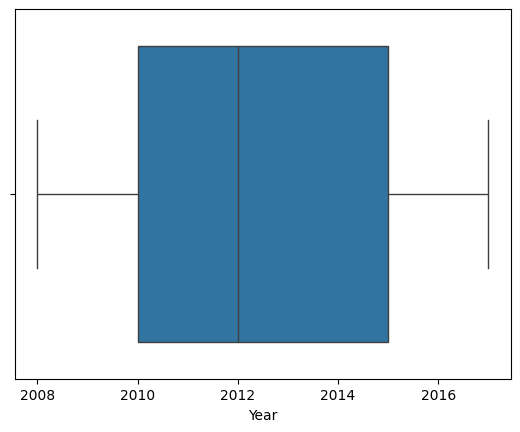

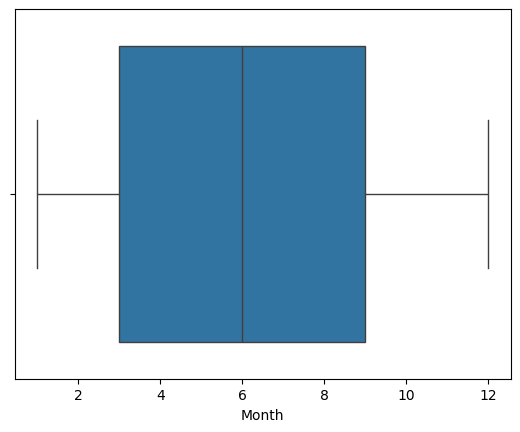

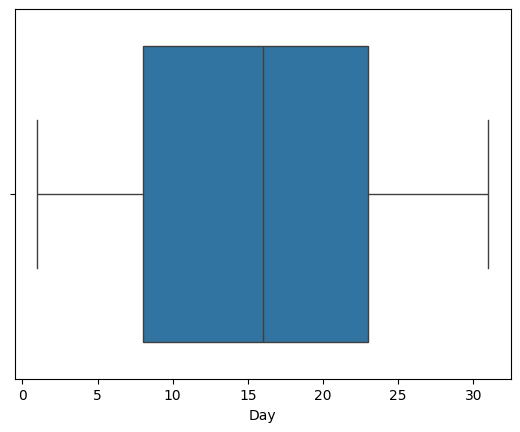

In [14]:
#check for outliers using seaborn
# Create box plots for each numerical feature
for col in data.select_dtypes(include=np.number).columns:
    sns.boxplot(x=data[col])
    plt.show()

**Observations**: In the above DataFrame, These are outliers present in 'MaxTemp','Rainfall','Evaporation','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',Temp9am','Temp3pm' columns. As seen these outliers are not extreme, so in my opinion keeping these data may not affect much on my model. 

## creating Dummy variable

In [16]:
# Assuming 'data' is your original DataFrame
df = pd.get_dummies(data, drop_first=True)  # Convert categorical variables to dummy variables
df[df.columns[df.dtypes == 'bool']] = df[df.columns[df.dtypes == 'bool']].astype(int)  # Convert boolean columns to integer
df.sample(6)  # Display the random 6 rows

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
1488,16.2,25.4,0.0,5.6,8.1,67.0,59.0,1018.3,1015.0,4.181523,4.21866,21.0,23.7,2012,4,1,0,0
609,16.5,20.7,0.0,10.2,0.5,72.0,68.0,1013.4,1010.0,7.000000,8.00000,18.3,19.4,2009,10,2,0,1
1879,10.0,16.7,5.0,2.4,0.2,93.0,90.0,1016.3,1014.8,8.000000,6.00000,10.6,13.8,2013,6,25,1,1
1423,21.8,25.3,2.0,2.8,2.5,80.0,70.0,1017.5,1016.8,4.181523,4.21866,23.5,24.1,2012,1,27,1,0
2589,13.6,22.6,0.0,4.0,6.5,57.0,29.0,1020.7,1019.5,6.000000,5.00000,17.1,21.9,2015,6,9,0,1
38,19.3,26.3,0.0,4.6,10.8,76.0,50.0,1025.1,1022.5,1.000000,0.00000,22.9,25.5,2008,3,10,0,0


## Treatment of Outliers

In [17]:
# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])



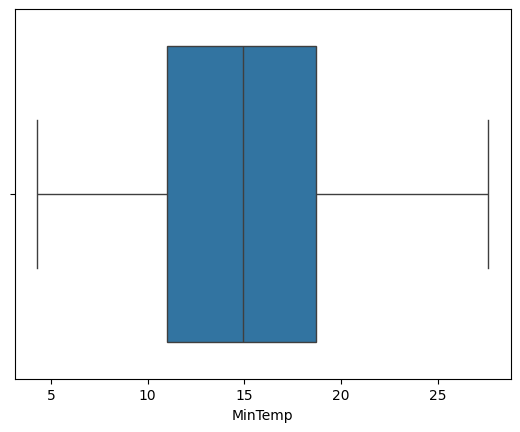

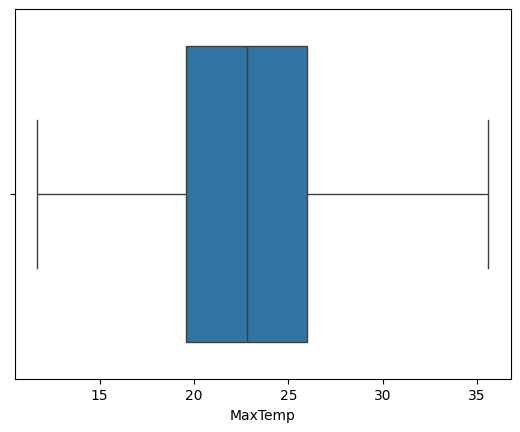

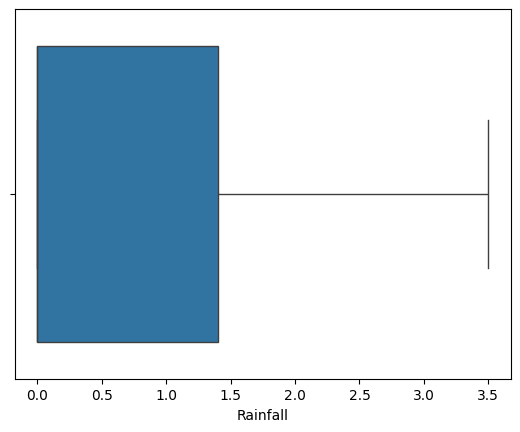

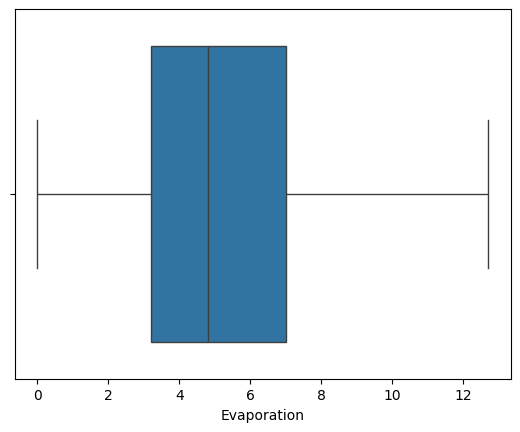

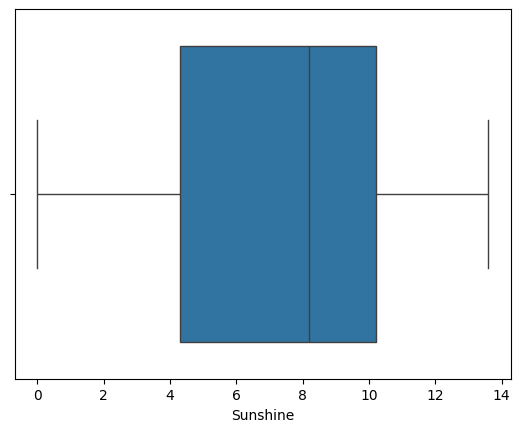

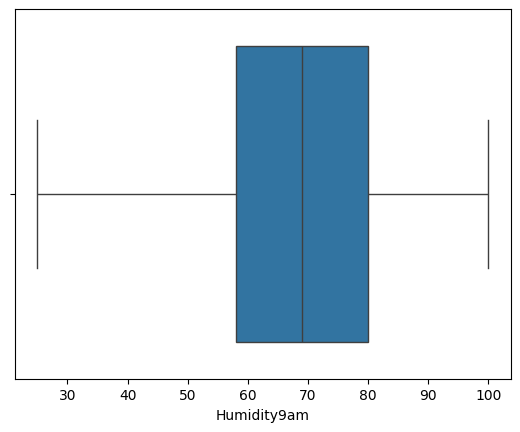

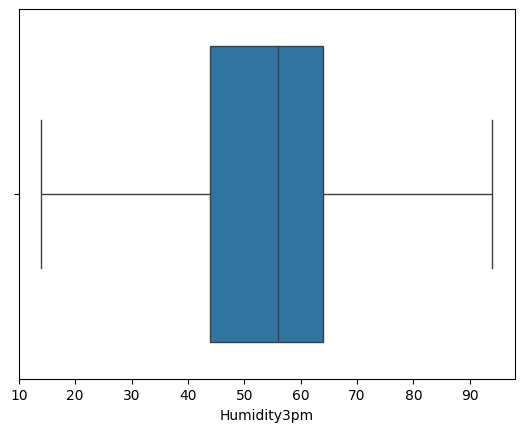

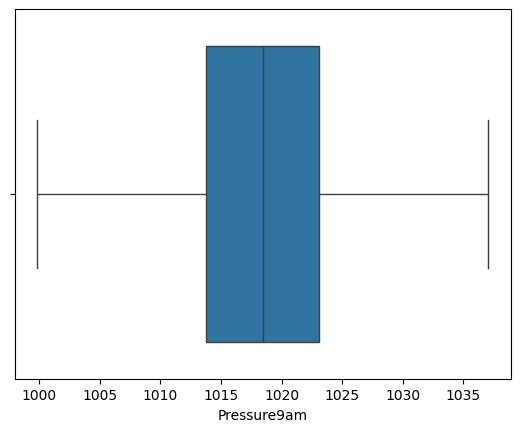

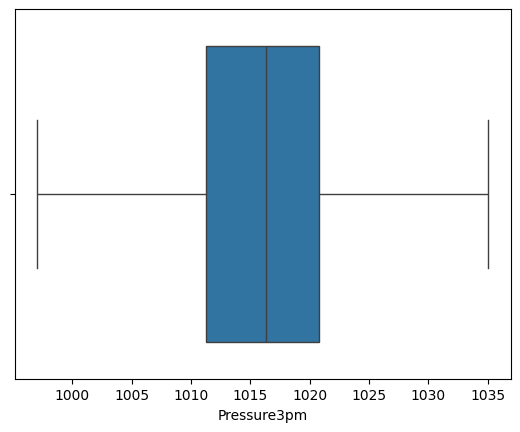

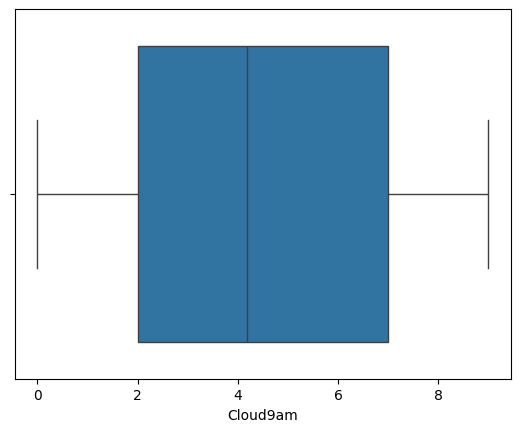

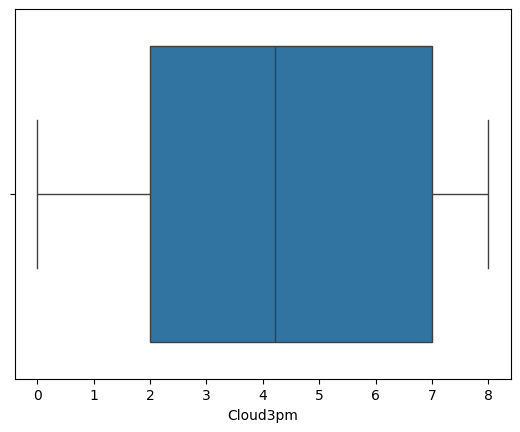

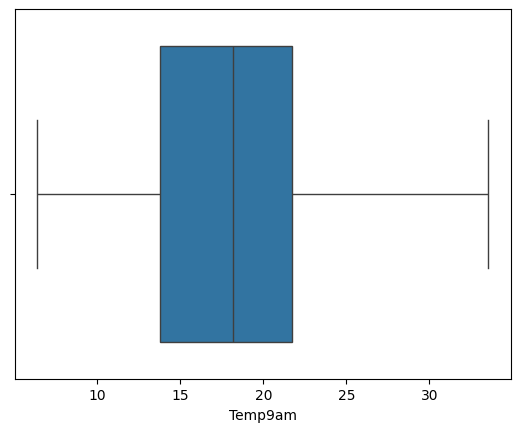

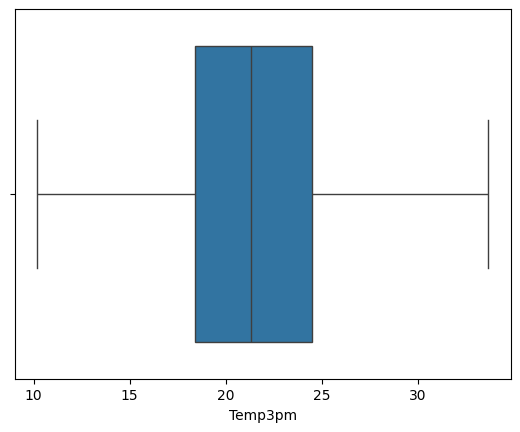

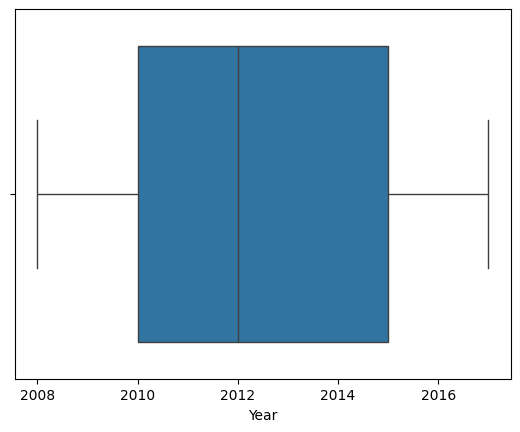

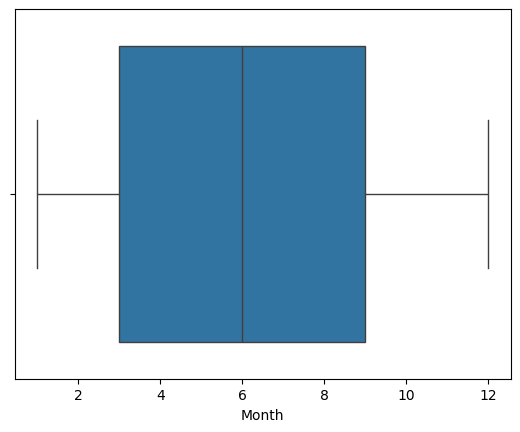

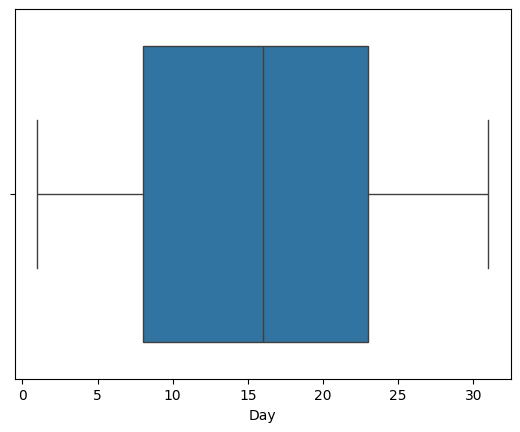

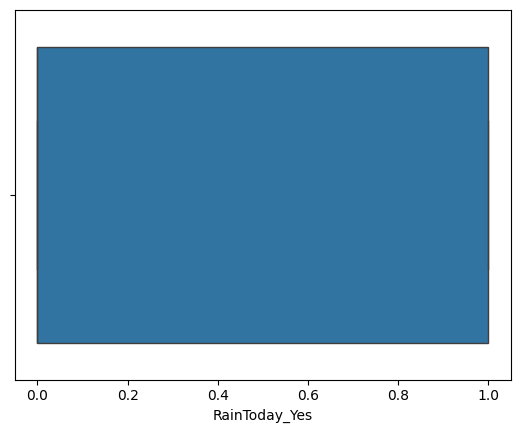

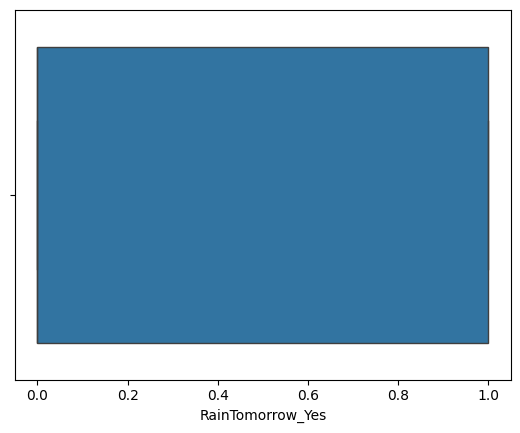

In [18]:
# Check for outliers again
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


**now there is no outliers remains**  

# Corelation between variables after removing outliers


In [19]:
corr = df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.775690,0.023171,0.570698,-0.062959,0.052908,0.271728,-0.395526,-0.357223,0.236288,0.163519,0.939013,0.758371,0.094124,-0.266661,0.004142,0.018690,0.079962
MaxTemp,0.775690,1.000000,-0.188239,0.512694,0.328741,-0.183404,-0.144058,-0.390471,-0.425164,-0.088230,-0.101725,0.862195,0.960018,0.136563,-0.187865,0.006856,-0.188545,-0.151841
Rainfall,0.023171,-0.188239,1.000000,-0.235492,-0.375991,0.418365,0.354544,-0.008021,0.052547,0.329424,0.263782,-0.072416,-0.189999,-0.000101,-0.045638,-0.017728,0.953486,0.358048
Evaporation,0.570698,0.512694,-0.235492,1.000000,0.177087,-0.394423,-0.101240,-0.345633,-0.302191,-0.037937,-0.038892,0.609323,0.479570,0.073485,0.041326,-0.006869,-0.230889,-0.063748
Sunshine,-0.062959,0.328741,-0.375991,0.177087,1.000000,-0.489488,-0.583373,-0.046806,-0.096027,-0.660555,-0.676397,0.114541,0.346971,0.014725,0.081483,0.017440,-0.367080,-0.521637
Humidity9am,0.052908,-0.183404,0.418365,-0.394423,-0.489488,1.000000,0.657988,0.263285,0.252339,0.423909,0.331951,-0.147018,-0.154477,-0.086079,-0.219864,0.010428,0.401023,0.329345
Humidity3pm,0.271728,-0.144058,0.354544,-0.101240,-0.583373,0.657988,1.000000,0.153133,0.182897,0.454424,0.472158,0.129572,-0.204563,-0.062977,-0.130022,0.007830,0.343130,0.471827
Pressure9am,-0.395526,-0.390471,-0.008021,-0.345633,-0.046806,0.263285,0.153133,1.000000,0.960806,-0.010435,-0.039749,-0.421709,-0.347228,0.017423,-0.008879,-0.015906,0.000834,-0.032176
Pressure3pm,-0.357223,-0.425164,0.052547,-0.302191,-0.096027,0.252339,0.182897,0.960806,1.000000,0.019873,-0.002591,-0.406225,-0.391848,0.015501,-0.034984,-0.017406,0.057890,0.011403
Cloud9am,0.236288,-0.088230,0.329424,-0.037937,-0.660555,0.423909,0.454424,-0.010435,0.019873,1.000000,0.608995,0.088716,-0.090757,0.029608,-0.046681,-0.012530,0.316502,0.329525


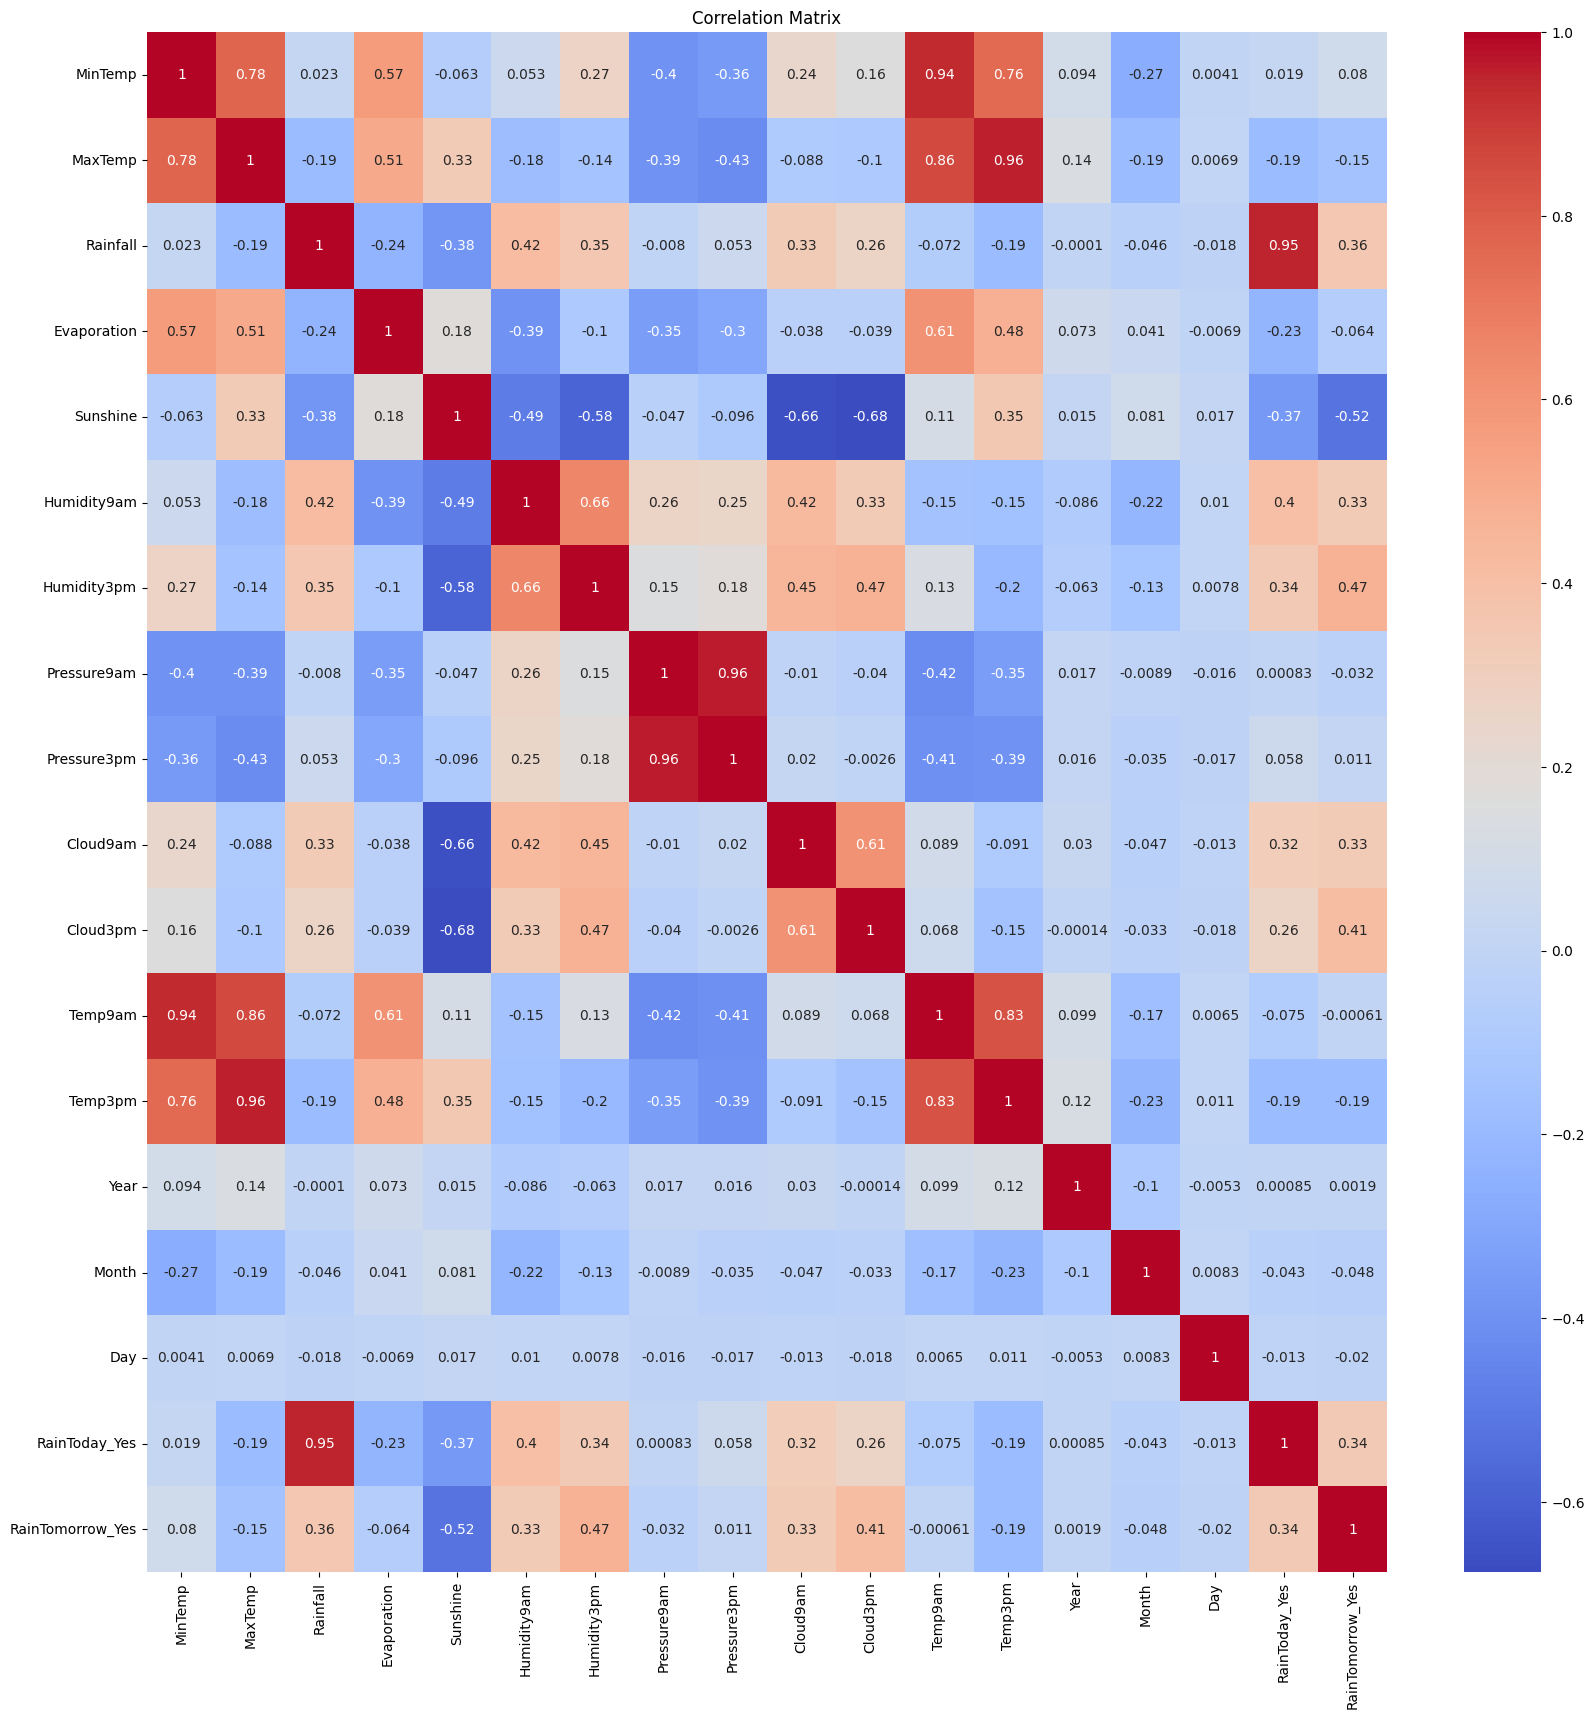

In [20]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(20, 20))  # Adjust the size as needed

# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [130]:
# Print the shape of the DataFrame
print(df.shape)

(3337, 18)


In [123]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day',
       'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object')

In [126]:
df.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
Year                float64
Month               float64
Day                 float64
RainToday_Yes       float64
RainTomorrow_Yes    float64
dtype: object

<Axes: xlabel='Day', ylabel='RainTomorrow_Yes'>

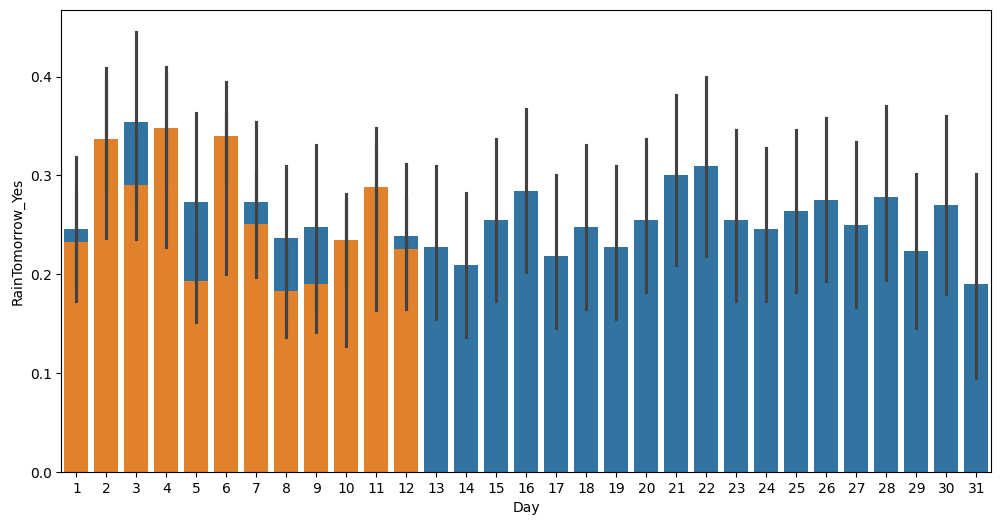

In [171]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x=df.Day, y="RainTomorrow_Yes")
sns.barplot(data=df, x=df.Month, y="RainTomorrow_Yes")


## Applying Machine Learning models without Feature Scaling
* Here I am applying all possible algorithm without any scaling to check performance of model

In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:

# Feature and target variable
X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes
321,19.3,27.4,0.0,4.8,8.4,65.0,68.0,1005.0,1001.2,2.000000,6.00000,23.1,24.0,2008.0,12.0,18.0,0.0
3095,18.4,21.7,0.0,8.0,6.2,65.0,63.0,1015.9,1015.7,4.000000,7.00000,20.8,19.9,2016.0,10.0,27.0,0.0
727,22.2,26.6,0.0,4.8,1.8,80.0,81.0,1012.1,1009.5,8.000000,8.00000,23.7,24.6,2010.0,1.0,28.0,0.0
1334,18.1,25.8,0.0,5.6,8.1,75.0,94.0,1012.1,1009.5,4.181523,4.21866,21.6,21.6,2011.0,10.0,30.0,0.0
1569,8.4,18.7,0.0,2.6,1.4,70.0,47.0,1016.4,1010.7,4.181523,4.21866,10.7,18.4,2012.0,6.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,14.8,22.0,3.5,4.2,1.5,90.0,49.0,1028.4,1026.3,8.000000,7.00000,15.7,21.8,2017.0,4.0,3.0,1.0
1499,13.0,22.8,3.5,2.8,10.1,80.0,54.0,1032.8,1030.9,4.181523,4.21866,16.4,22.2,2012.0,4.0,12.0,1.0
1456,20.2,22.0,2.8,4.8,0.0,89.0,92.0,1013.9,1012.5,4.181523,4.21866,20.5,21.1,2012.0,2.0,29.0,1.0
2914,16.0,24.2,0.0,4.8,4.6,75.0,65.0,1022.8,1018.5,4.000000,8.00000,18.8,23.3,2016.0,4.0,29.0,0.0


### LogisticRegression

In [34]:
# Initialize and train the model
log_reg_model = LogisticRegression()

In [35]:
log_reg_model.fit(X_train, y_train) # Initialize and train the model

LogisticRegression()

In [36]:
# Predictions
log_reg_predictions = log_reg_model.predict(X_test)

# Evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_predictions)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Confusion Matrix:\n", log_reg_confusion_matrix)


Logistic Regression Accuracy: 0.8233532934131736
Logistic Regression Confusion Matrix:
 [[450  34]
 [ 84 100]]


**True Negatives (TN): 450
False Positives (FP): 34
False Negatives (FN): 84
True Positives (TP): 100
Insight: The Logistic Regression model performs well but has more false negatives compared to the Bagging model, meaning it misses more actual rainy days.**

### LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize and train the LDA model
lda = LDA()
lda.fit(X_train, y_train)

# Make predictions
y_pred_lda = lda.predict(X_test)
y_train_lda=lda.predict(X_train)
# Evaluate the model
print("LDA Accuracy(test):", accuracy_score(y_test, y_pred_lda))
print("LDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

print("LDA Accuracy(train):", accuracy_score(y_train, y_train_lda))
print("LDA Confusion Matrix:\n", confusion_matrix(y_train, y_train_lda))
print("LDA Classification Report:\n", classification_report(y_train, y_train_lda))


LDA Accuracy(test): 0.8233532934131736
LDA Confusion Matrix:
 [[443  41]
 [ 77 107]]
LDA Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       484
         1.0       0.72      0.58      0.64       184

    accuracy                           0.82       668
   macro avg       0.79      0.75      0.76       668
weighted avg       0.82      0.82      0.82       668

LDA Accuracy(train): 0.8328962158111652
LDA Confusion Matrix:
 [[1823  165]
 [ 281  400]]
LDA Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      1988
         1.0       0.71      0.59      0.64       681

    accuracy                           0.83      2669
   macro avg       0.79      0.75      0.77      2669
weighted avg       0.83      0.83      0.83      2669



### Decision Tree Classifier

In [38]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, dt_preds)}')


Decision Tree Accuracy: 0.7544910179640718
Decision Tree Confusion Matrix:
[[392  92]
 [ 72 112]]


**Accuracy: 75.45%
Confusion Matrix:
True Positives (TP): 112
True Negatives (TN): 392
False Positives (FP): 92
False Negatives (FN): 72
The model correctly predicted 75.45% of the instances.**

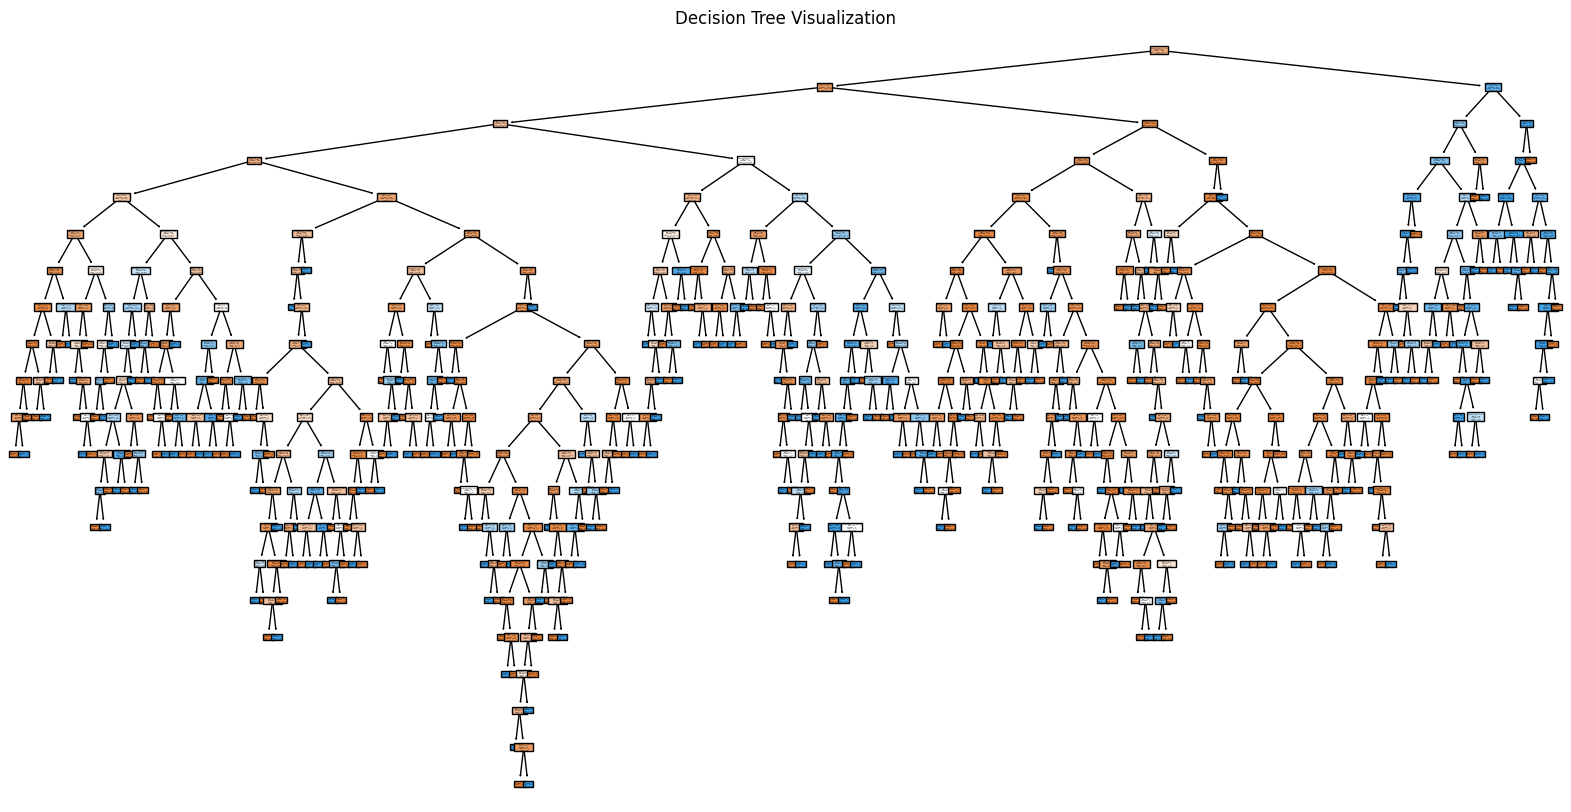

In [39]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(dt_model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.title('Decision Tree Visualization')
plt.show()

Decision Tree Accuracy: 0.8068862275449101
Decision Tree Confusion Matrix:
[[442  42]
 [ 87  97]]


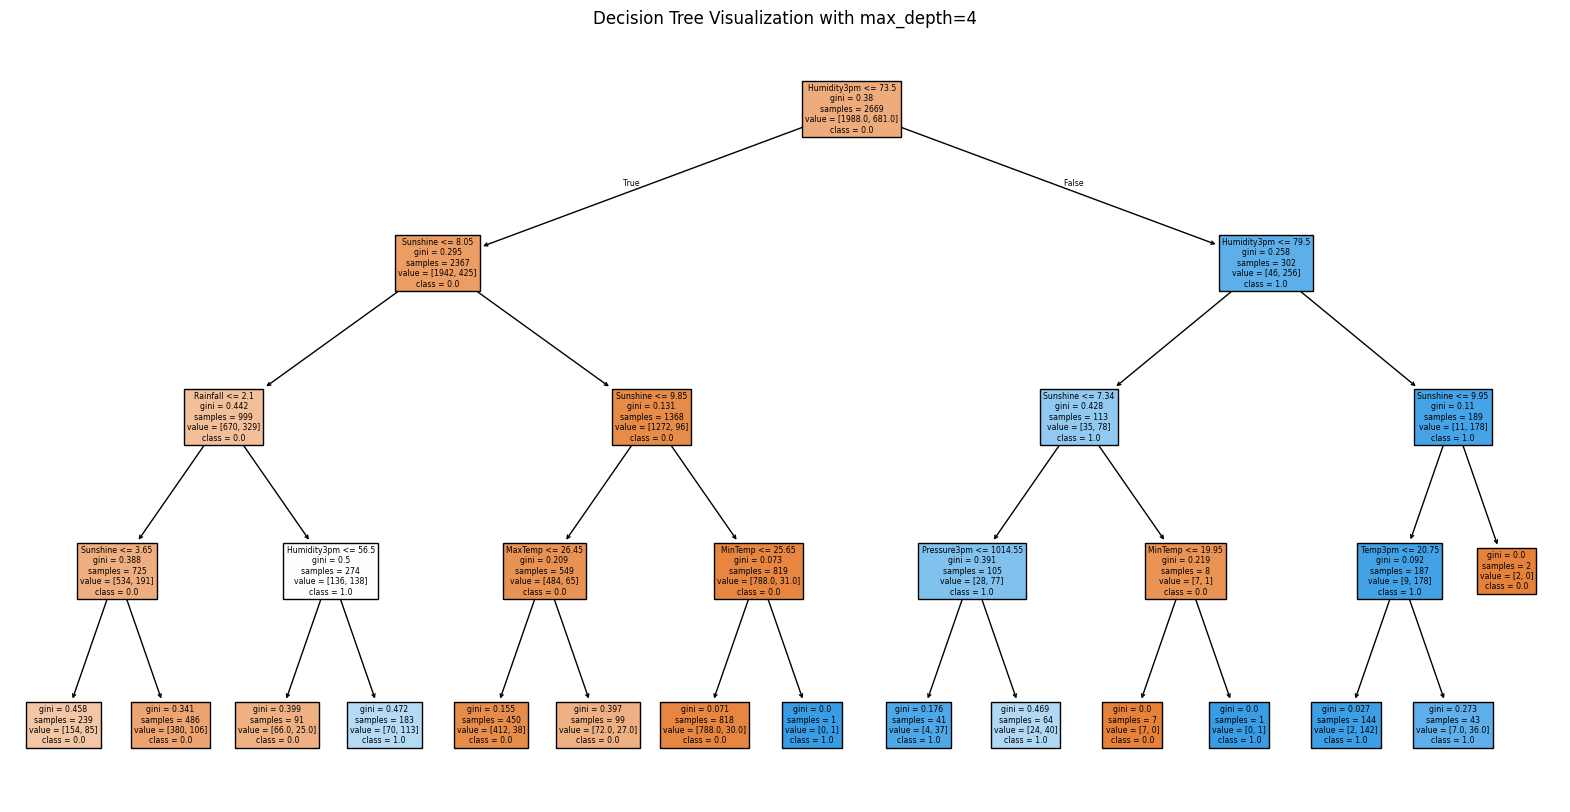

In [40]:
# Initialize and train the Decision Tree Classifier with max_depth=4
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_preds = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree Confusion Matrix:\n{confusion_matrix(y_test, dt_preds)}')

# Optional: Plot the Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(dt_model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.title('Decision Tree Visualization with max_depth=4')
plt.show()

### Random Forest Classifier

In [41]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn import metrics

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest Confusion Matrix:\n{confusion_matrix(y_test, rf_preds)}')

Random Forest Accuracy: 0.8278443113772455
Random Forest Confusion Matrix:
[[449  35]
 [ 80 104]]


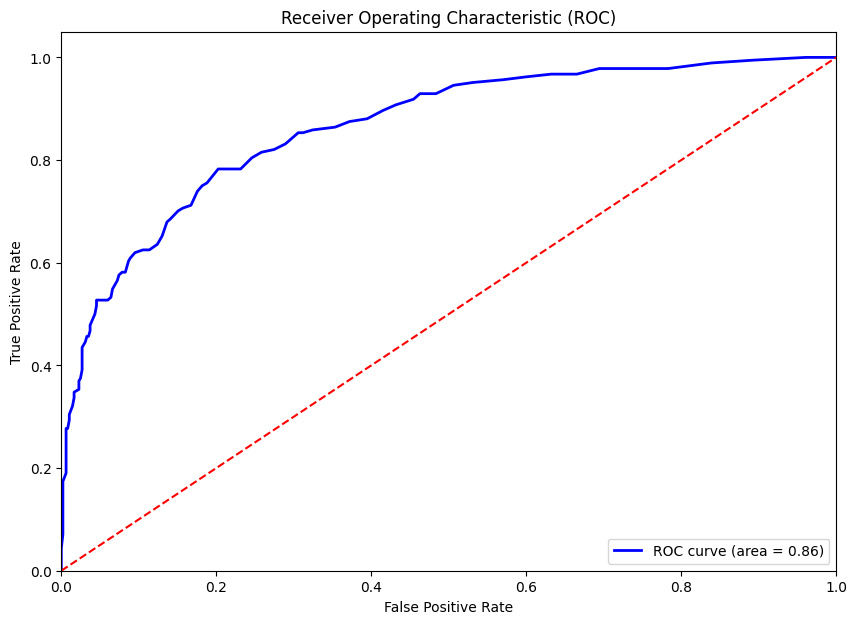

In [42]:
# Make predictions
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting Classifier

In [43]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_preds)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')
print(f'Gradient Boosting Confusion Matrix:\n{confusion_matrix(y_test, gb_preds)}')

Gradient Boosting Accuracy: 0.8218562874251497
Gradient Boosting Confusion Matrix:
[[449  35]
 [ 84 100]]


### K-Nearest Neighbors (KNN) without Scaling

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Define parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best KNN Parameters:", grid_search.best_params_)
print("Best KNN Score:", grid_search.best_score_)

# Use the best estimator for predictions
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

# Evaluate the best KNN model
print("Best KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Best KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_knn))
print("Best KNN Classification Report:\n", classification_report(y_test, y_pred_best_knn))

Best KNN Parameters: {'n_neighbors': 9}
Best KNN Score: 0.8317747749646902
Best KNN Accuracy: 0.8023952095808383
Best KNN Confusion Matrix:
 [[447  37]
 [ 95  89]]
Best KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       484
         1.0       0.71      0.48      0.57       184

    accuracy                           0.80       668
   macro avg       0.77      0.70      0.72       668
weighted avg       0.79      0.80      0.79       668



In [45]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8023952095808383
KNN Confusion Matrix:
 [[447  37]
 [ 95  89]]
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       484
         1.0       0.71      0.48      0.57       184

    accuracy                           0.80       668
   macro avg       0.77      0.70      0.72       668
weighted avg       0.79      0.80      0.79       668



### XGBoost Classifier

In [46]:
import xgboost as xgb
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f'XGBoost Accuracy: {xgb_accuracy}')
print(f'XGBoost Confusion Matrix:\n{confusion_matrix(y_test, xgb_preds)}')

XGBoost Accuracy: 0.811377245508982
XGBoost Confusion Matrix:
[[434  50]
 [ 76 108]]


### Implementing Grid Search

**Implementing Grid Search**
* Use GridSearchCV to search over the grid.
* You'll need to specify the number of cross-validation folds, typically 3 or 5, and the scoring metric (e.g., accuracy).



In [47]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters
# Instantiate the model
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [48]:
# Implementing Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

#Evaluating the Results
#Best Parameters and Best Score
#After running the Grid Search, you can access the best parameters and the best cross-validation score.
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.8010533268686189


**Best Parameters:**

criterion: 'gini',

max_depth: 10,

min_samples_leaf: 1,

min_samples_split: 10,

Best Score: 0.8037 (approximately)

### Confusion Matrix and Other Metrics

In [49]:
# Best model from Grid Search
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
#accuracy_score
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f'Decision Tree Accuracy: {dt_accuracy}')
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[428  56]
 [ 84 100]]
Decision Tree Accuracy: 0.8068862275449101
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       484
         1.0       0.64      0.54      0.59       184

    accuracy                           0.79       668
   macro avg       0.74      0.71      0.72       668
weighted avg       0.78      0.79      0.78       668



In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the parameter grid
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize the base model (Decision Tree)
base_model = DecisionTreeClassifier()

# Initialize the Bagging Classifier
bagging = BaggingClassifier(estimator=base_model, random_state=42)

# Perform Grid Search
grid_bagging = GridSearchCV(bagging, param_grid_bagging, cv=5, scoring='accuracy', n_jobs=-1)
grid_bagging.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Bagging Parameters: {grid_bagging.best_params_}')
print(f'Best Bagging Accuracy: {grid_bagging.best_score_}')

# Evaluate on the test set
bagging_best = grid_bagging.best_estimator_
bagging_best_preds = bagging_best.predict(X_test)
bagging_best_accuracy = accuracy_score(y_test, bagging_best_preds)
print(f'Best Bagging Test Accuracy: {bagging_best_accuracy}')
print(f'Best Bagging Confusion Matrix:\n{confusion_matrix(y_test, bagging_best_preds)}')


Best Bagging Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 100}
Best Bagging Accuracy: 0.8437675232413516
Best Bagging Test Accuracy: 0.8353293413173652
Best Bagging Confusion Matrix:
[[456  28]
 [ 82 102]]


**Bagging Parameters: Uses 70% of features and 50% of samples for each model, with 100 models in total.
Accuracy: Achieved 84.38% on training and 83.53% on testing.
Confusion Matrix:
True Negatives (TN): 456
False Positives (FP): 28
False Negatives (FN): 82
True Positives (TP): 102
Insight: The model performs well overall, but it tends to miss some actual rainy days (more false negatives).**

##  Modeling with Scaling , Test Size 0.2

In [51]:
from sklearn.preprocessing import StandardScaler
# Assuming previous preprocessing steps have been done

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the entire dataset
# Split the dataset with test size 0.2
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
# Initialize and train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_20, y_train_20)

# Make predictions
lr_preds_20 = lr_model.predict(X_test_20)

# Evaluate the model
lr_accuracy_20 = accuracy_score(y_test_20, lr_preds_20)
lr_confusion_20 = confusion_matrix(y_test_20, lr_preds_20)

print(f'Logistic Regression Accuracy (Test Size 0.2): {lr_accuracy_20:.4f}')
print(f'Logistic Regression Confusion Matrix (Test Size 0.2):\n{lr_confusion_20}\n')


Logistic Regression Accuracy (Test Size 0.2): 0.8219
Logistic Regression Confusion Matrix (Test Size 0.2):
[[447  37]
 [ 82 102]]



### Decision Tree

In [53]:
dt_model.fit(X_train_20, y_train_20)
dt_preds_20 = dt_model.predict(X_test_20)
dt_accuracy_20 = accuracy_score(y_test_20, dt_preds_20)
print(f'Decision Tree Accuracy (Test Size 0.2): {dt_accuracy_20}')
print(f'Decision Tree Confusion Matrix:\n{confusion_matrix(y_test_20, dt_preds_20)}')


Decision Tree Accuracy (Test Size 0.2): 0.8068862275449101
Decision Tree Confusion Matrix:
[[442  42]
 [ 87  97]]


In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = XGBClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 6, 9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Implement Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best model
xgb_best = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [56]:
# Random Forest
rf_model.fit(X_train_20, y_train_20)
rf_preds_20 = rf_model.predict(X_test_20)
rf_accuracy_20 = accuracy_score(y_test_20, rf_preds_20)
print(f'Random Forest Accuracy (Test Size 0.2): {rf_accuracy_20}')
print(f'Random Forest Confusion Matrix:\n{confusion_matrix(y_test_20, dt_preds_20)}')

# Gradient Boosting
gb_model.fit(X_train_20, y_train_20)
gb_preds_20 = gb_model.predict(X_test_20)
gb_accuracy_20 = accuracy_score(y_test_20, gb_preds_20)
print(f'Gradient Boosting Accuracy (Test Size 0.2): {gb_accuracy_20}')
print(f'Gradient Boosting  Confusion Matrix:\n{confusion_matrix(y_test_20, dt_preds_20)}')
# XGBoost
xgb_best.fit(X_train_20, y_train_20)
xgb_best_preds_20 = xgb_best.predict(X_test_20)
xgb_best_accuracy_20 = accuracy_score(y_test_20, xgb_best_preds_20)
print(f'XGBoost Accuracy (Test Size 0.2): {xgb_best_accuracy_20}')
print(f'XGBoost Confusion Matrix:\n{confusion_matrix(y_test_20, dt_preds_20)}')
# Bagging
bagging_best.fit(X_train_20, y_train_20)
bagging_best_preds_20 = bagging_best.predict(X_test_20)
bagging_best_accuracy_20 = accuracy_score(y_test_20, bagging_best_preds_20)
print(f'Bagging Accuracy (Test Size 0.2): {bagging_best_accuracy_20}')
print(f'Bagging Confusion Matrix:\n{confusion_matrix(y_test_20, dt_preds_20)}')

Random Forest Accuracy (Test Size 0.2): 0.8278443113772455
Random Forest Confusion Matrix:
[[442  42]
 [ 87  97]]
Gradient Boosting Accuracy (Test Size 0.2): 0.8218562874251497
Gradient Boosting  Confusion Matrix:
[[442  42]
 [ 87  97]]
XGBoost Accuracy (Test Size 0.2): 0.811377245508982
XGBoost Confusion Matrix:
[[442  42]
 [ 87  97]]
Bagging Accuracy (Test Size 0.2): 0.8353293413173652
Bagging Confusion Matrix:
[[442  42]
 [ 87  97]]


### Modeling with Scaling, test Size 0.1

In [57]:
# Split the dataset with test size 0.1
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


In [58]:
# Initialize and train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_10, y_train_10)

# Make predictions
lr_preds_10 = lr_model.predict(X_test_10)

# Evaluate the model
lr_accuracy_10 = accuracy_score(y_test_10, lr_preds_10)
lr_confusion_10 = confusion_matrix(y_test_10, lr_preds_10)

print(f'Logistic Regression Accuracy (Test Size 0.1): {lr_accuracy_10:.4f}')
print(f'Logistic Regression Confusion Matrix (Test Size 0.1):\n{lr_confusion_10}\n')


Logistic Regression Accuracy (Test Size 0.1): 0.8503
Logistic Regression Confusion Matrix (Test Size 0.1):
[[233  14]
 [ 36  51]]



In [59]:
# Decision Tree
dt_model.fit(X_train_10, y_train_10)
dt_preds_10 = dt_model.predict(X_test_10)
dt_accuracy_10 = accuracy_score(y_test_10, dt_preds_10)
print(f'Decision Tree Accuracy (Test Size 0.1): {dt_accuracy_10}')
print(f'Decision Tree Confusion Matrix:\n{confusion_matrix(y_test_10, dt_preds_10)}')

# Random Forest
rf_model.fit(X_train_10, y_train_10)
rf_preds_10 = rf_model.predict(X_test_10)
rf_accuracy_10 = accuracy_score(y_test_10, rf_preds_10)
print(f'Random Forest Accuracy (Test Size 0.1): {rf_accuracy_10}')
print(f'Random Forest Confusion Matrix:\n{confusion_matrix(y_test_10, dt_preds_10)}')

# Gradient Boosting
gb_model.fit(X_train_10, y_train_10)
gb_preds_10 = gb_model.predict(X_test_10)
gb_accuracy_10 = accuracy_score(y_test_10, gb_preds_10)
print(f'Gradient Boosting Accuracy (Test Size 0.1): {gb_accuracy_10}')
print(f'Gradient Boosting  Confusion Matrix:\n{confusion_matrix(y_test_10, dt_preds_10)}')

# XGBoost
xgb_best.fit(X_train_10, y_train_10)
xgb_best_preds_10 = xgb_best.predict(X_test_10)
xgb_best_accuracy_10 = accuracy_score(y_test_10, xgb_best_preds_10)
print(f'XGBoost Accuracy (Test Size 0.1): {xgb_best_accuracy_10}')
print(f'XGBoost Confusion Matrix:\n{confusion_matrix(y_test_10, dt_preds_10)}')

# Bagging
bagging_best.fit(X_train_10, y_train_10)
bagging_best_preds_10 = bagging_best.predict(X_test_10)
bagging_best_accuracy_10 = accuracy_score(y_test_10, bagging_best_preds_10)
print(f'Bagging Accuracy (Test Size 0.1): {bagging_best_accuracy_10}')
print(f'Bagging Confusion Matrix:\n{confusion_matrix(y_test_10, dt_preds_10)}')

Decision Tree Accuracy (Test Size 0.1): 0.8323353293413174
Decision Tree Confusion Matrix:
[[233  14]
 [ 42  45]]
Random Forest Accuracy (Test Size 0.1): 0.8502994011976048
Random Forest Confusion Matrix:
[[233  14]
 [ 42  45]]
Gradient Boosting Accuracy (Test Size 0.1): 0.844311377245509
Gradient Boosting  Confusion Matrix:
[[233  14]
 [ 42  45]]
XGBoost Accuracy (Test Size 0.1): 0.8383233532934131
XGBoost Confusion Matrix:
[[233  14]
 [ 42  45]]
Bagging Accuracy (Test Size 0.1): 0.8682634730538922
Bagging Confusion Matrix:
[[233  14]
 [ 42  45]]


## Comparison of models

In [63]:
# Assuming you have already computed these accuracies:
# - dt_accuracy
# - rf_accuracy
# - gb_accuracy
# - knn_accuracy
# - xgb_accuracy
# - bagging_accuracy
# - lr_accuracy (Logistic Regression)
# - dt_scaled_accuracy (Decision Tree with scaling)
#-....................................................................
# Define a dictionary with model names and their corresponding accuracies
model_accuracies = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy,
    'XGBoost': xgb_accuracy,
    'Bagging': bagging_best_accuracy,
    'Logistic Regression': log_reg_accuracy,
    'Logistic Regression Accuracy (Test Size 0.2)': lr_accuracy_20,
    'Decision Tree (Scaled) test_size=2': dt_accuracy_20,
    'Random Forest Accuracy (Test Size 0.2)': rf_accuracy_20,
    'Gradient Boosting Accuracy (Test Size 0.2)': gb_accuracy_20,
    'XGBoost Accuracy (Test Size 0.2)': xgb_best_accuracy_20,
    'Bagging Accuracy (Test Size 0.2)': bagging_best_accuracy_20,
    'Logistic Regression Accuracy (Test Size 0.1)': lr_accuracy_10,
    'Decision Tree Accuracy (Test Size 0.1)': dt_accuracy_10,
    'Random Forest Accuracy (Test Size 0.1)': rf_accuracy_10,
    'XGBoost Accuracy (Test Size 0.1)': xgb_best_accuracy_10,
    'Bagging Accuracy (Test Size 0.1)': bagging_best_accuracy_10
}

# Print out the accuracy of each model
print("Model Accuracies:\n")
for model, accuracy in model_accuracies.items():
    print(f'{model}: {accuracy:.4f}')


Model Accuracies:

Decision Tree: 0.8069
Random Forest: 0.8278
Gradient Boosting: 0.8219
XGBoost: 0.8114
Bagging: 0.8353
Logistic Regression: 0.8234
Logistic Regression Accuracy (Test Size 0.2): 0.8219
Decision Tree (Scaled) test_size=2: 0.8069
Random Forest Accuracy (Test Size 0.2): 0.8278
Gradient Boosting Accuracy (Test Size 0.2): 0.8219
XGBoost Accuracy (Test Size 0.2): 0.8114
Bagging Accuracy (Test Size 0.2): 0.8353
Logistic Regression Accuracy (Test Size 0.1): 0.8503
Decision Tree Accuracy (Test Size 0.1): 0.8323
Random Forest Accuracy (Test Size 0.1): 0.8503
XGBoost Accuracy (Test Size 0.1): 0.8383
Bagging Accuracy (Test Size 0.1): 0.8683


In [67]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("LDA Accuracy(test):", accuracy_score(y_test, y_pred_lda))
print("LDA Accuracy(train):", accuracy_score(y_train, y_train_lda))

KNN Accuracy: 0.8023952095808383
LDA Accuracy(test): 0.8233532934131736
LDA Accuracy(train): 0.8328962158111652


* **LDA** has **higher accuracy** on both the **test (82.34%)** and **training (83.29%)** sets compared to **KNN (80.24%)**.
**LDA** is slightly better at generalizing to new data than **KNN**.

### 4. Which Model’s Performance Is Best and What Could Be the Possible Reason for That?

**The Bagging model with a test size of 0.1 achieved the highest accuracy of 0.8683. The possible reasons for Bagging's superior performance include:**

**Reduction in Overfitting:** By averaging multiple models, Bagging reduces the variance and prevents overfitting, which is common in individual decision trees.

**Stability and Robustness:** Bagging improves stability and robustness by training multiple models on different subsets of the data and then aggregating the results.

**Test Size Effect:** The smaller test size (0.1) might have provided a more stable training environment, leading to better generalization on the test set.

### 5. We Can Take to Improve This Selected Model’s Performance Even Further

To improve the Bagging model's performance further, the following steps can be taken:

**Hyperparameter Tuning:**

Perform a thorough hyperparameter search to optimize the number of estimators, the maximum depth of trees, and other relevant parameters.

**Feature Engineering:**

Create additional features that could provide more insights, such as interactions between existing features or the inclusion of lag variables.

**Ensemble Stacking:**

Implement Stacking, where multiple models (including the Bagging model) are combined to create a meta-model, potentially improving accuracy further.

**Cross-Validation:**

Use cross-validation techniques like k-fold cross-validation to ensure the model’s robustness across different subsets of data.

**Ensemble with Diverse Models:**

Combine Bagging with other diverse models, such as Neural Networks or Support Vector Machines, to capture different aspects of the data.